# Data Exploration Sandbox

This is a temporary file. It is for some quick data exploration and graphing.

In [1]:
suppressPackageStartupMessages(
    {suppressWarnings({
        library(tidyverse)
        library(repr)
        library(tidymodels)
        library(tidyr)
        library(ggplot2)        
        library(scales)
        library(patchwork) 
    })
})

In [2]:
options(repr.plot.width = 9, repr.plot.height = 7, repr.matrix.max.rows = 7,readr.show_col_types = FALSE)

player_data <- read_csv("https://raw.githubusercontent.com/FabianoGLentini/player-subscription-ml/refs/heads/main/data/players.csv")


In [3]:
# Wrangle fist pass
player_df <- player_data |> # TODO must consider reworking a joining of some labels in gender etc due to low representaions
            select( subscribe, gender, played_hours, experience, Age) |>
            drop_na() |>
            mutate(
                subscribe = as_factor(subscribe),  # lgl -> fct for analysis and modeling
                gender = as_factor(gender),        # chr -> fct for analysis and modeling
                played = factor(as.logical(played_hours)),
                experience = as_factor(experience) # chr -> fct for analysis and modeling
            ) 

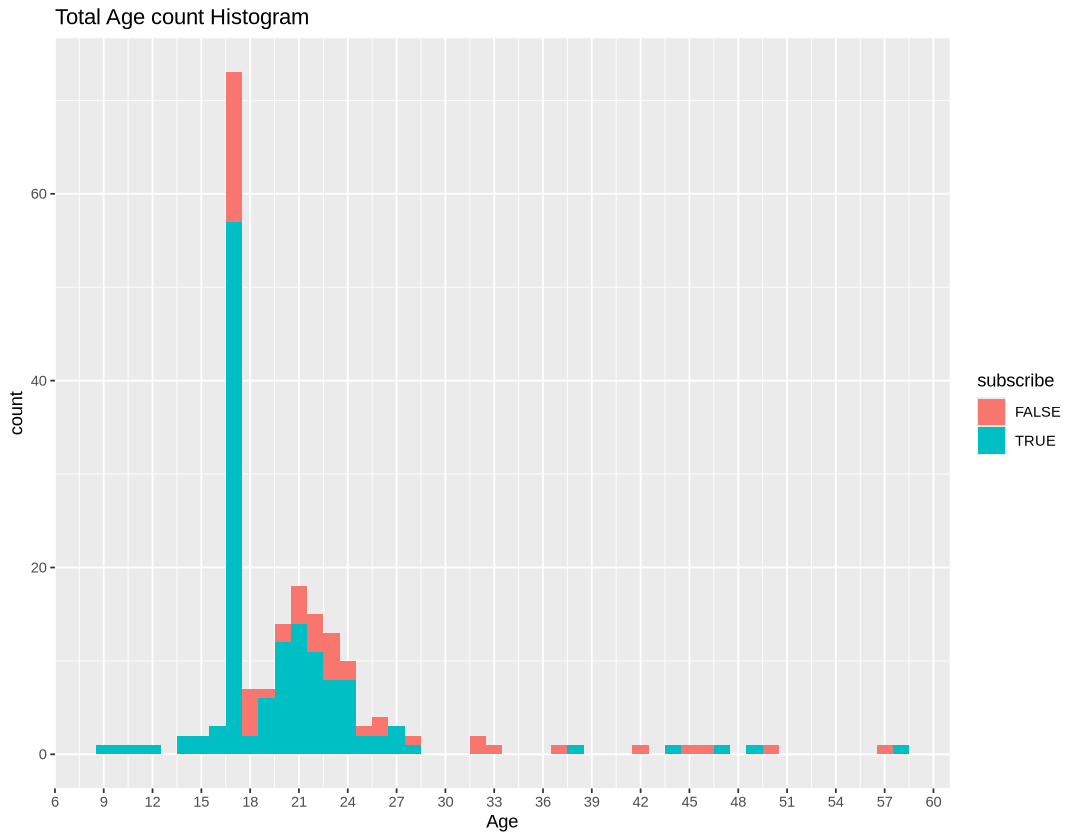

In [4]:
# VIEW AGES
# ALL AGES
histogram_age <- player_df |> 
            ggplot(aes(x = Age, fill = subscribe)) + 
            geom_histogram(binwidth = 1) +
            ggtitle("Total Age count Histogram") +
            scale_x_continuous(n.breaks = 20)
histogram_age


Warning message:
“Removed 18 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


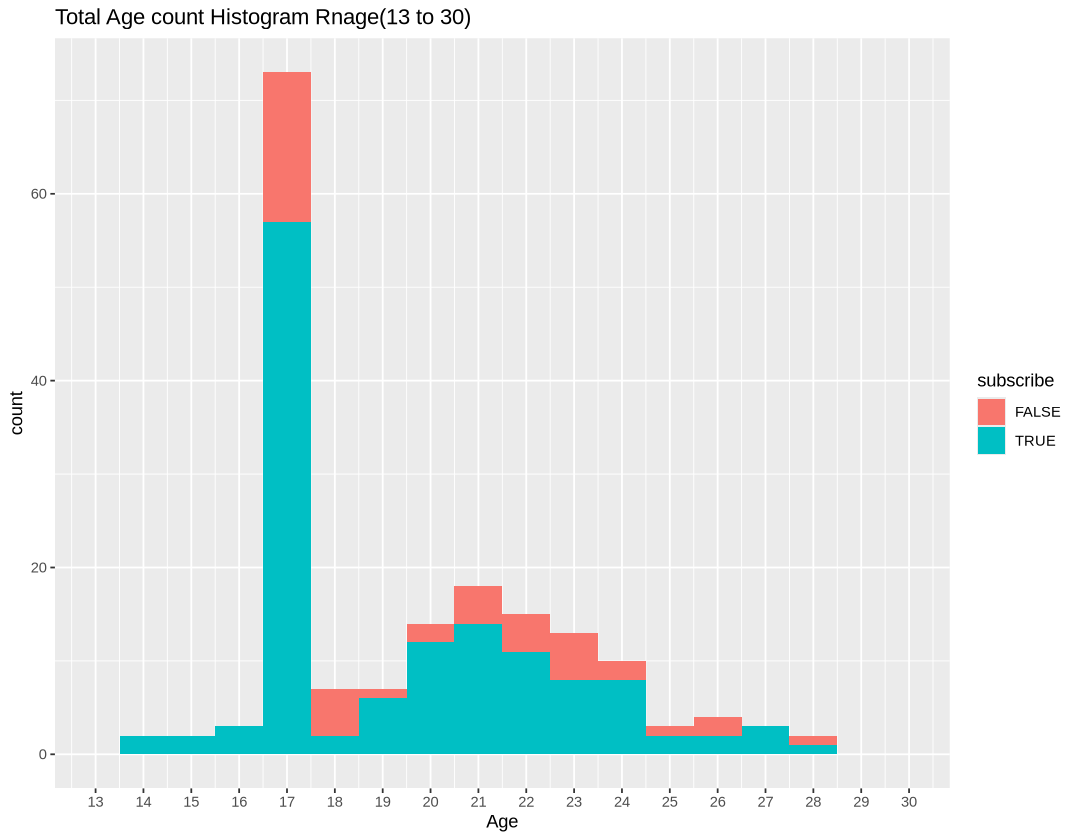

In [5]:
# Range from 13 to 30
histogram_age_ranged <- player_df |> 
            ggplot(aes(x = Age, fill = subscribe)) + 
            geom_histogram(binwidth = 1) +
            ggtitle("Total Age count Histogram Rnage(13 to 30)") +
            scale_x_continuous(n.breaks = 20, limits = c(13, 30))
histogram_age_ranged

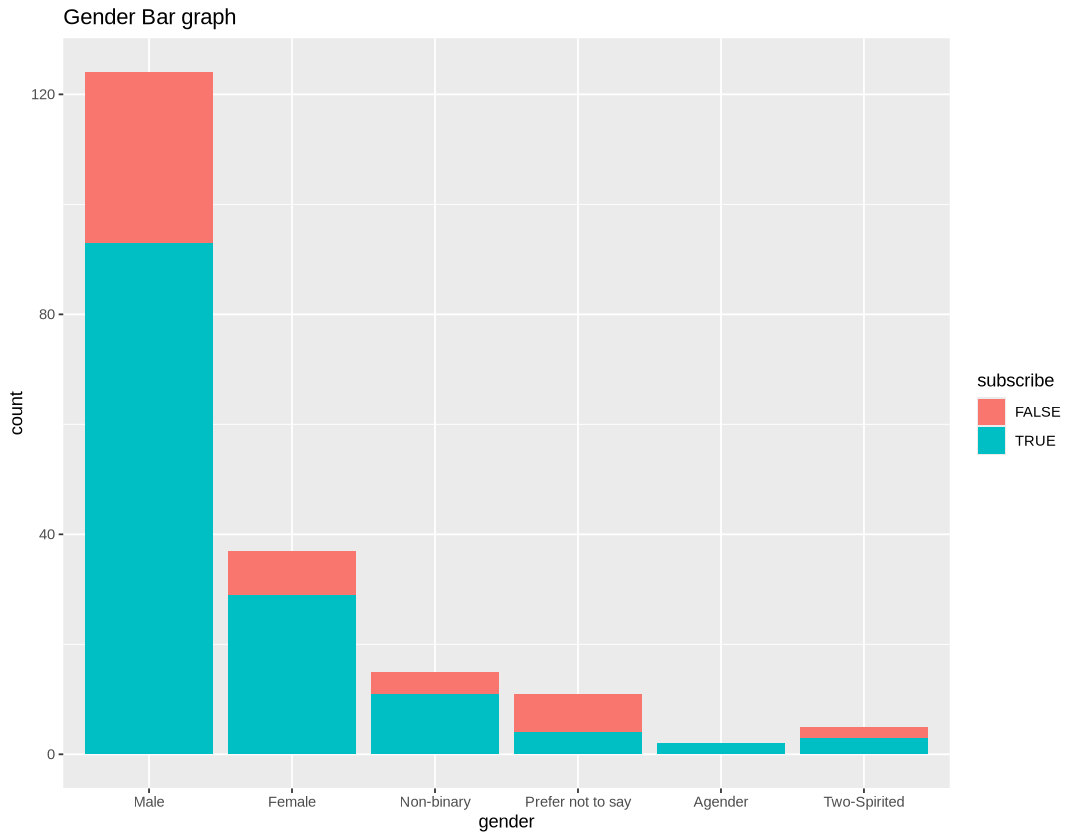

In [6]:
# VIEW GENDER 
bar_gender <- player_df |> 
            ggplot(aes(x = gender, fill = subscribe)) + 
            geom_bar() +
            ggtitle("Gender Bar graph")

bar_gender

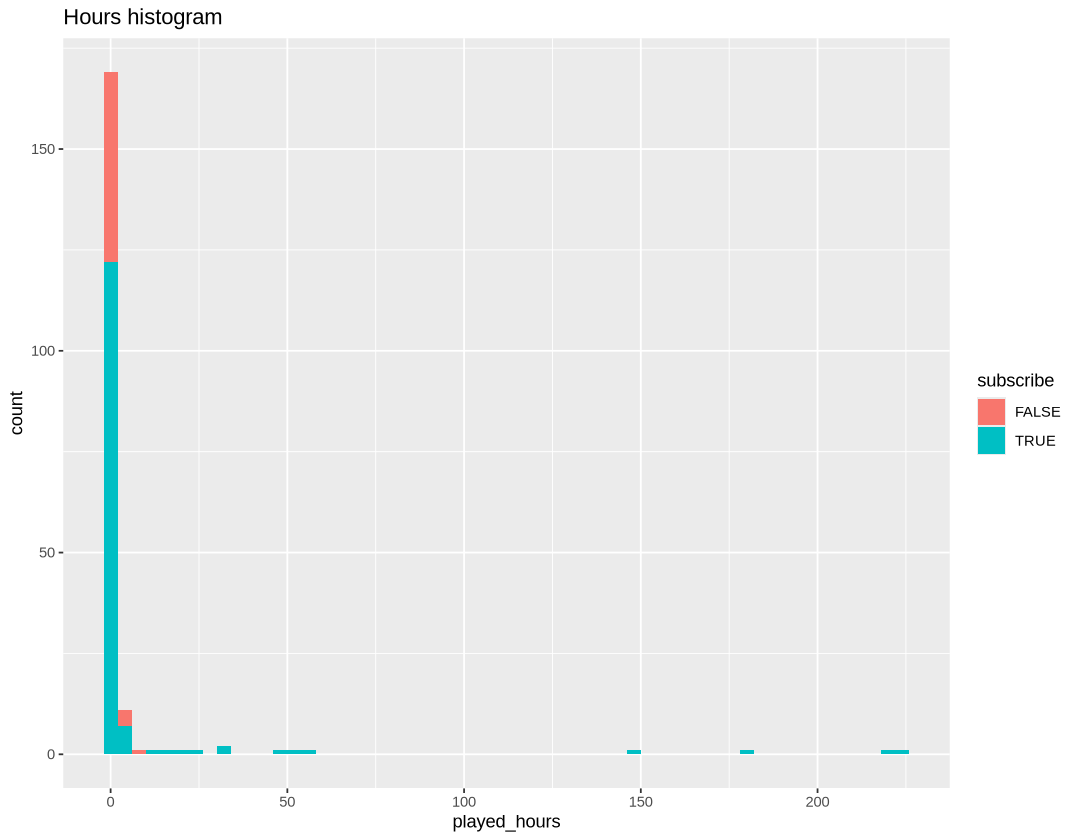

In [7]:
# VIEW HOURS
# ALL HOURS
histogram_hours <- player_df |> 
            ggplot(aes(x = played_hours, fill = subscribe)) + 
            geom_histogram(binwidth = 4) +
            ggtitle("Hours histogram") 
            # scale_x_continuous(n.breaks = 20, limits = c(13, 30))
histogram_hours

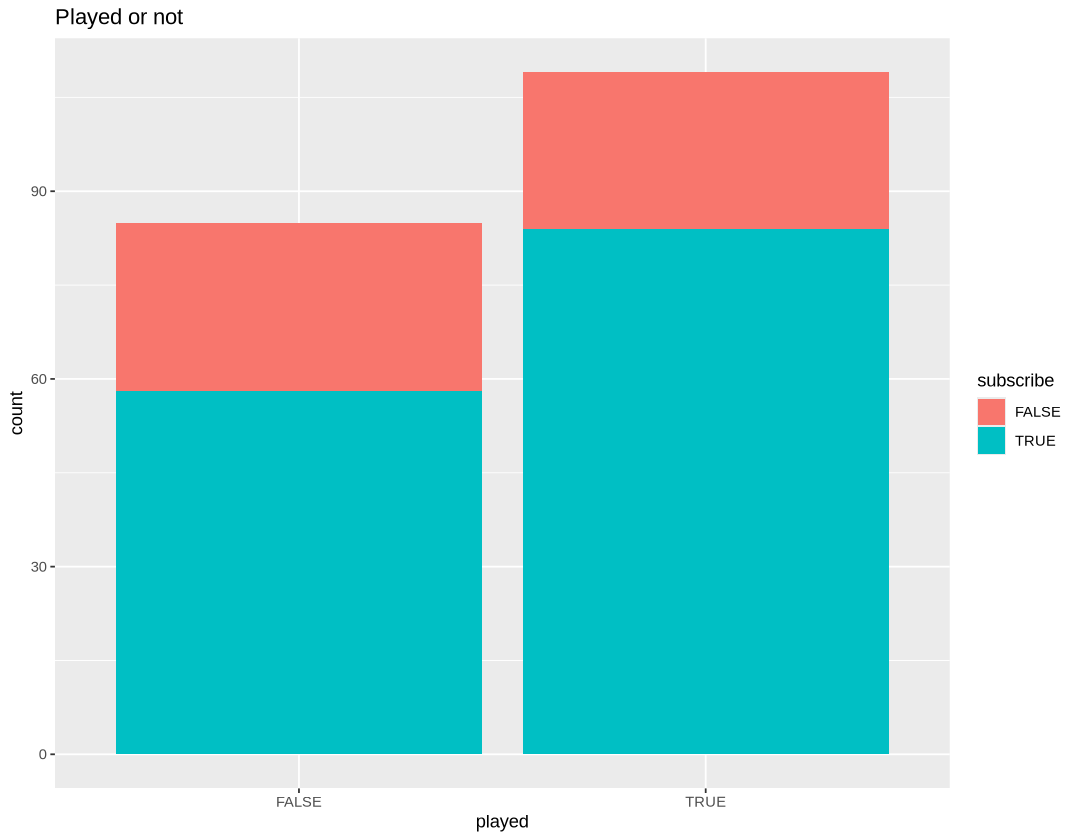

In [8]:
boolean_hours <- player_df |> 
            ggplot(aes(x = played, fill = subscribe)) + 
            geom_bar() +
            ggtitle("Played or not")
boolean_hours

Warning message:
“Removed 13 rows containing missing values or values outside the scale range
(`geom_point()`).”


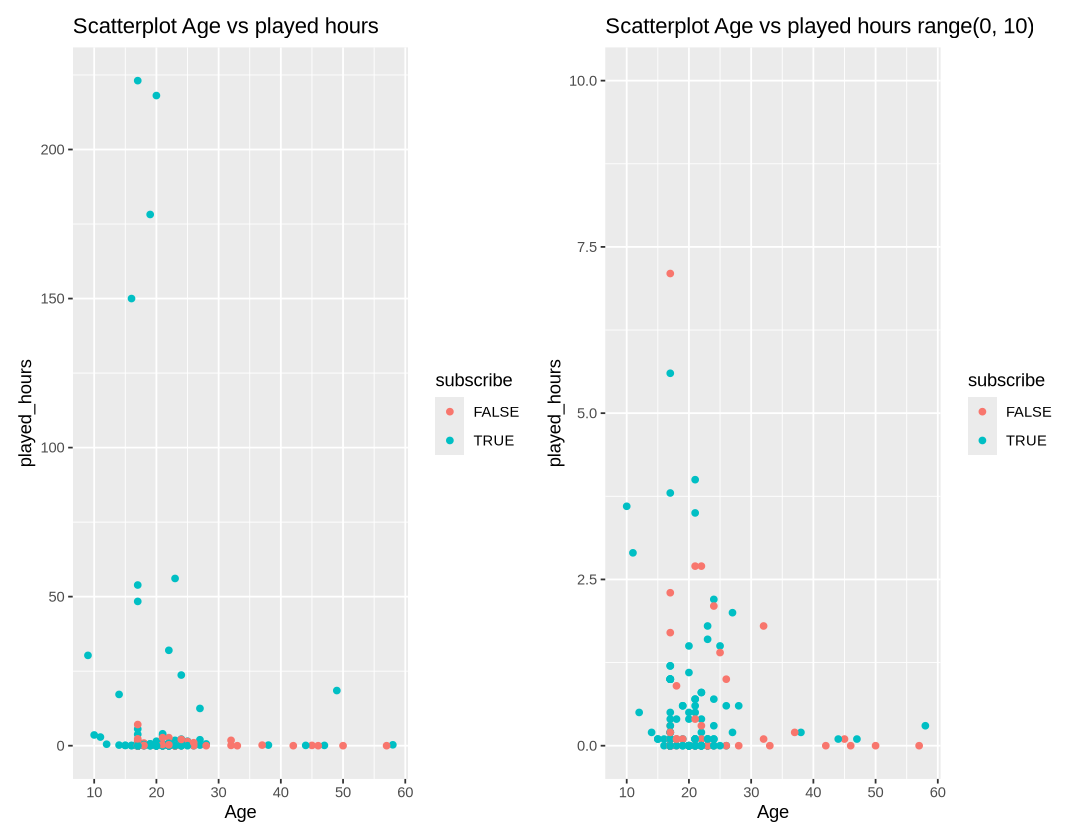

In [11]:
# SCATERPLOT Age Time played
scaterplot_AH <- player_df |> 
            ggplot(aes(x = Age, y = played_hours, colour = subscribe)) + 
            geom_point() +
            ggtitle("Scatterplot Age vs played hours")

scaterplot_AH_range <- player_df |> 
            ggplot(aes(x = Age, y = played_hours, colour = subscribe)) + 
            geom_point() +
            ggtitle("Scatterplot Age vs played hours range(0, 10)") + 
            ylim(c(0, 10))
scaterplot_AH + scaterplot_AH_range

In [10]:
?facet_grid

facet_grid {ggplot2},R Documentation
"rows, cols","A set of variables or expressions quoted by vars() and defining faceting groups on the rows or columns dimension. The variables can be named (the names are passed to labeller). For compatibility with the classic interface, rows can also be a formula with the rows (of the tabular display) on the LHS and the columns (of the tabular display) on the RHS; the dot in the formula is used to indicate there should be no faceting on this dimension (either row or column)."
scales,"Are scales shared across all facets (the default, ""fixed""), or do they vary across rows (""free_x""), columns (""free_y""), or both rows and columns (""free"")?"
space,"If ""fixed"", the default, all panels have the same size. If ""free_y"" their height will be proportional to the length of the y scale; if ""free_x"" their width will be proportional to the length of the x scale; or if ""free"" both height and width will vary. This setting has no effect unless the appropriate scales also vary."
shrink,"If TRUE, will shrink scales to fit output of statistics, not raw data. If FALSE, will be range of raw data before statistical summary."
labeller,"A function that takes one data frame of labels and returns a list or data frame of character vectors. Each input column corresponds to one factor. Thus there will be more than one with vars(cyl, am). Each output column gets displayed as one separate line in the strip label. This function should inherit from the ""labeller"" S3 class for compatibility with labeller(). You can use different labeling functions for different kind of labels, for example use label_parsed() for formatting facet labels. label_value() is used by default, check it for more details and pointers to other options."
as.table,"If TRUE, the default, the facets are laid out like a table with highest values at the bottom-right. If FALSE, the facets are laid out like a plot with the highest value at the top-right."
switch,"By default, the labels are displayed on the top and right of the plot. If ""x"", the top labels will be displayed to the bottom. If ""y"", the right-hand side labels will be displayed to the left. Can also be set to ""both""."
drop,"If TRUE, the default, all factor levels not used in the data will automatically be dropped. If FALSE, all factor levels will be shown, regardless of whether or not they appear in the data."
margins,"Either a logical value or a character vector. Margins are additional facets which contain all the data for each of the possible values of the faceting variables. If FALSE, no additional facets are included (the default). If TRUE, margins are included for all faceting variables. If specified as a character vector, it is the names of variables for which margins are to be created."
axes,"Determines which axes will be drawn. When ""margins"" (default), axes will be drawn at the exterior margins. ""all_x"" and ""all_y"" will draw the respective axes at the interior panels too, whereas ""all"" will draw all axes at all panels."
